# Modeling

In [137]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor

import random
random.seed(222)

In [120]:
X_train_l = pd.read_csv('./data/listings_Xtrain.csv', index_col='Unnamed: 0')
X_test_l = pd.read_csv('./data/listings_Xtest.csv', index_col='Unnamed: 0')

X_train_r = pd.read_csv('./data/X_train_r.csv', index_col='Unnamed: 0')
X_test_r = pd.read_csv('./data/X_test_r.csv', index_col='Unnamed: 0')


y_train_r = pd.read_csv('./data/y_train_r.csv', index_col='Unnamed: 0')
y_test_r = pd.read_csv('./data/y_test_r.csv', index_col='Unnamed: 0')

In [122]:
r_X_train =  X_train_r['lem_comments']
r_X_test = X_test_r['lem_comments']

r_y_train = y_train_r['type']
r_y_test = y_test_r['type']

# Listings Classification Modeling

## Logistic Regression

In [102]:
y_train_l.shape

NameError: name 'y_train_l' is not defined

In [3]:
lr = LinearRegression()

In [29]:
lr.fit(X_train_l, y_train)

LinearRegression()

In [30]:
lr.score(X_train_l, y_train)

0.07829814051081252

In [31]:
lr.score(X_test_l, y_test)

-0.04302994494945511

## K Neighbors Classifier

## Decision Tree Classifier

## Random Forests Classifier

## AdaBoost Classifier

## GradientBoost Classifier

## Bagging Classifier

# Reviews Classification Modeling

## Logistic Regression

In [129]:
pipe_cvec_logreg = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression(random_state = 222, max_iter=1000))
])

pipe_cvec_logreg_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0], 
    'logreg__solver': ['lbfgs', 'liblinear']
}

gs_cvec_logreg = GridSearchCV(pipe_cvec_logreg, pipe_cvec_logreg_params, n_jobs = -1)
gs_cvec_logreg.fit(r_X_train, r_y_train)

/Users/myacarrizosa/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=222))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'logreg__solver': ['lbfgs', 'liblinear']})

In [133]:
print(f' Train accuracy: {gs_cvec_logreg.score(r_X_train, r_y_train)}, Test accuracy: {gs_cvec_logreg.score(r_X_test, r_y_test)}')

 Train accuracy: 0.8647953979845784, Test accuracy: 0.7711418431036593


In [132]:
gs_cvec_logreg.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'logreg__solver': 'lbfgs'}

In [134]:
y_pred_logreg = gs_cvec_logreg.predict(r_X_test)

In [135]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(r_y_test, y_pred_logreg).ravel()

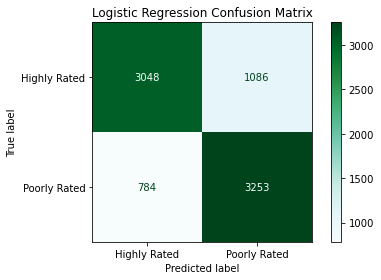

In [138]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, y_pred_logreg),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'BuGn')
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout();

In [139]:
#Sensitivity 
print(f' Sensitivity: {tp_lr / (tp_lr+fn_lr)}')
#Specificity
print(f' Specificity: {tn_lr / (tn_lr+fp_lr)}')
#Precision 
print(f' Precision: {tp_lr/(tp_lr+fp_lr)}')

 Sensitivity: 0.8057963834530592
 Specificity: 0.737300435413643
 Precision: 0.7497119151878313


## K Neighbors Classifier

In [140]:
pipe_cvec_knn = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean = False)),
    ('knn', KNeighborsClassifier())
])

pipe_cvec_knn_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan']
    
}

gs_cvec_knn = GridSearchCV(pipe_cvec_knn, pipe_cvec_knn_params, n_jobs = -1)
gs_cvec_knn.fit(r_X_train, r_y_train)

/Users/myacarrizosa/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [153]:
print(f' Train accuracy: {gs_cvec_knn.score(r_X_train, r_y_train)}, Test accuracy: {gs_cvec_knn.score(r_X_test, r_y_test)}')

 Train accuracy: 0.7583941903635103, Test accuracy: 0.6622200465059356


In [154]:
gs_cvec_knn.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 7,
 'knn__weights': 'uniform'}

In [155]:
y_pred_knn = gs_cvec_knn.predict(r_X_test)

In [156]:
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(r_y_test, y_pred_knn).ravel()

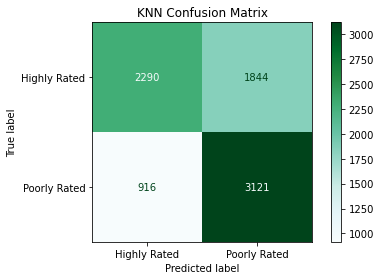

In [157]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, y_pred_knn),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'BuGn')
plt.title('KNN Confusion Matrix')
plt.tight_layout();

In [158]:
#Sensitivity 
print(f' Sensitivity: {tp_knn / (tp_knn+fn_knn)}')
#Specificity
print(f' Specificity: {tn_knn / (tn_knn+fp_knn)}')
#Precision 
print(f' Precision: {tp_knn/(tp_knn+fp_knn)}')

 Sensitivity: 0.7730988357691355
 Specificity: 0.5539429124334785
 Precision: 0.628600201409869


## Decision Tree

In [ ]:
pipe_cvec_dt = Pipeline([
    ('cvec', CountVectorizer()),
    'dt', DecisionTreeClassifier(random_state = 222)
])

pipe_cvec_rf_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'dt__max_depth': [3, 5, 8],
    'dt__min_samples_leaf': [1, 2, 5]
    
}

gs_cvec_dt = GridSearchCV(pipe_cvec_dt, pipe_cvec_dt_params, n_jobs = -1)
gs_cvec_dt.fit(r_X_train, r_y_train)


In [ ]:
print(f' Train accuracy: {gs_cvec_dt.score(r_X_train, r_y_train)}, Test accuracy: {gs_cvec_dt.score(r_X_test, r_y_test)}')

In [ ]:
gs_cvec_dt.best_params_

In [ ]:
y_pred_dt = gs_cvec_dt.predict(r_X_test)

In [ ]:
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(r_y_test, y_pred_dt).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, y_pred_dt),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'BuGn')
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {tp_dt / (tp_dt+fn_dt)}')
#Specificity
print(f' Specificity: {tn_dt / (tn_dt+fp_dt)}')
#Precision 
print(f' Precision: {tp_dt/(tp_dt+fp_dt)}')

## Random Forest

In [ ]:
pipe_cvec_rf = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier(random_state =222))
])

pipe_cvec_rf_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'rf__n_estimators': [100, 125, 150],
    'rf__max_depth': [3, 5, 8],
    'rf__min_samples_leaf': [1, 2, 5]
    
}

gs_cvec_rf = GridSearchCV(pipe_cvec_rf, pipe_cvec_rf_params, n_jobs = -1)
gs_cvec_rf.fit(r_X_train, r_y_train)

In [ ]:
print(f' Train accuracy: {gs_cvec_rf.score(r_X_train, r_y_train)}, Test accuracy: {gs_cvec_rf.score(r_X_test, r_y_test)}')

In [ ]:
gs_cvec_rf.best_params_

In [ ]:
y_pred_rf = gs_cvec_rf.predict(r_X_test)

In [ ]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(r_y_test, y_pred_rf).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, y_pred_rf),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'BuGn')
plt.title('Random Forests Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {tp_rf / (tp_rf+fn_rf)}')
#Specificity
print(f' Specificity: {tn_rf / (tn_rf+fp_rf)}')
#Precision 
print(f' Precision: {tp_rf/(tp_rf+fp_rf)}')

## ADA Boost

In [ ]:
pipe_cvec_ada = Pipeline([
    ('cvec', CountVectorizer()),
    ('ada', AdaBoostClassifier(random_state =222))
])

pipe_cvec_ada_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'ada__n_estimators': [100, 125, 150],
    'ada__learning_rate': [1.0, 1.5]
    
}

gs_cvec_ada = GridSearchCV(pipe_cvec_ada, pipe_cvec_ada_params, n_jobs = -1)
gs_cvec_ada.fit(r_X_train, r_y_train)

In [ ]:
print(f' Train accuracy: {gs_cvec_ada.score(r_X_train, r_y_train)}, Test accuracy: {gs_cvec_ada.score(r_X_test, r_y_test)}')

In [ ]:
gs_cvec_ada.best_params_

In [ ]:
y_pred_ada = gs_cvec_ada.predict(r_X_test)

In [ ]:
tn_ada, fp_ada, fn_ada, tp_ada = confusion_matrix(r_y_test, y_pred_ada).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, y_pred_ada),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'BuGn')
plt.title('AdaBoost Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {tp_ada / (tp_ada+fn_ada)}')
#Specificity
print(f' Specificity: {tn_ada / (tn_ada+fp_ada)}')
#Precision 
print(f' Precision: {tp_ada/(tp_ada+fp_ada)}')

## Gradient Boost

In [ ]:
pipe_cvec_g = Pipeline([
    ('cvec', CountVectorizer()),
    ('g_boost', GradientBoostingClassifier(random_state = 222))
])

pipe_cvec_g_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'g_boost__n_estimators': [100, 125, 150],
    'g_boost__learning_rate': [0.8, 1.0, 1.5],
    'g_boost__min_samples_split': [1, 2]
    
}

gs_cvec_g = GridSearchCV(pipe_cvec_g, pipe_cvec_g_params, n_jobs = -1)
gs_cvec_g.fit(r_X_train, r_y_train)

In [ ]:
print(f' Train accuracy: {gs_cvec_g.score(r_X_train, r_y_train)}, Test accuracy: {gs_cvec_g.score(r_X_test, r_y_test)}')

In [ ]:
gs_cvec_g.best_params_

In [ ]:
y_pred_g = gs_cvec_g.predict(r_X_test)

In [ ]:
tn_g, fp_g, fn_g, tp_g = confusion_matrix(r_y_test, y_pred_g).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, y_pred_g),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'BuGn')
plt.title('Gradient Boost Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {tp_g / (tp_g+fn_g)}')
#Specificity
print(f' Specificity: {tn_g / (tn_g+fp_g)}')
#Precision 
print(f' Precision: {tp_g/(tp_g+fp_g)}')

## Bagging Classifier